# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [44]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [5]:
# loading the dataset
data = pd.read_csv("./csvfiles/stock_data.csv")

<IPython.core.display.Javascript object>

In [4]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

The dataset has 340 rows and 15 columns

In [5]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [6]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [7]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

Ticker Symbol, Security, GICS Sector & GICS Sub Industry are of object type & rest are either float or integer type
There are no NULL values in the dataset

In [8]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

<IPython.core.display.Javascript object>

In [9]:
# Dropping Ticker Symbol
df.drop("Ticker_Symbol", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# lets check duplicate observations
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicate records in the dataset

###### Let's take a look at the summary of the data

In [11]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Security,340,340,Level 3 Communications,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net_Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327937,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0


<IPython.core.display.Javascript object>

There are 11 unique GICS_Sector, and Industrials is the most common of the same
There are 104 unique GICS_Sub_Industry, and Oil & Gas Exploration & Production is the most common of the same
The average Current_Price & the median Current_Price  indicates data is right skewed with some high outliers.
Average ROE  indicates data is right skewed with some outliers. 
The average Net_Cash_Flow is median Net_Cash_Flow (right skewed, high outliers)
The average Net_Income ,median Net_Income (again right skewed, high outliers). 
The average Earnings_Per_Share (left skewed)
The average Estimated_Shares_Outstanding (right skewed with outliers)
The average P/E , P/B ratio are 32.61 and -1.7 while median values are 20.8 and -1.06 respectively. P/E and P/B are the ratio of company's stock price per share by earnings per share & by (total assets - total liabilities) per share. 
The average P/B ratio being negative indicates there are some companies in serious financial stress with liabilities exceeding assets (left skewed)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [13]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

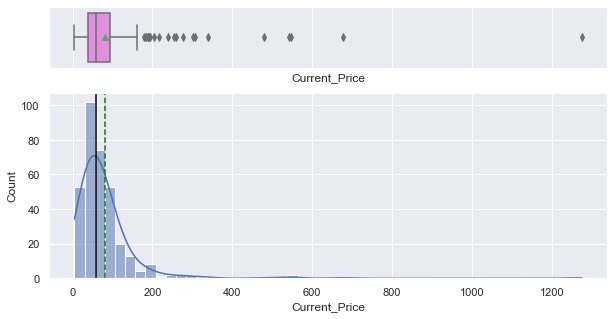

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, num_cols[0], bins=50, kde=True, figsize=(10, 5))

Current_Price is right skewed with several positive outliers

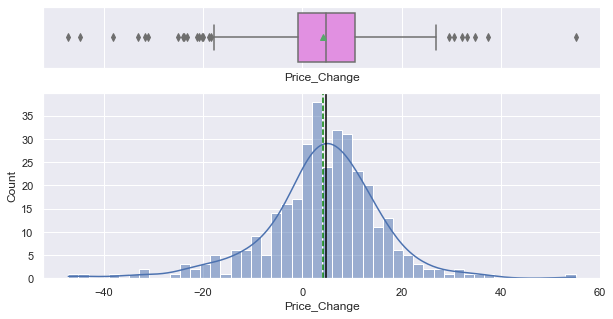

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, num_cols[1], bins=50, kde=True, figsize=(10, 5))

Price_Change has  normal distribution with some negative and positive outliers

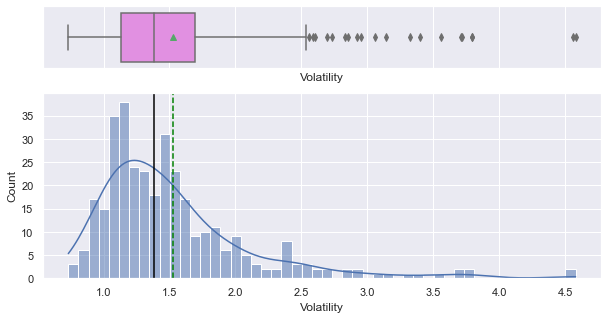

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, num_cols[2], bins=50, kde=True, figsize=(10, 5))

Volatility is right skewed with some positive outliers

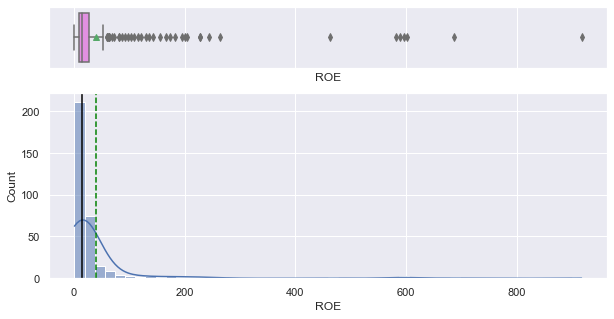

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, num_cols[3], bins=50, kde=True, figsize=(10, 5))

ROE is right skewed with several positive outliers

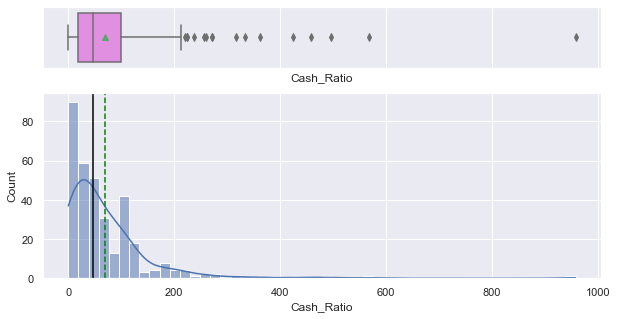

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, num_cols[4], bins=50, kde=True, figsize=(10, 5))

Cash_Ratio is right skewed with some positive outliers

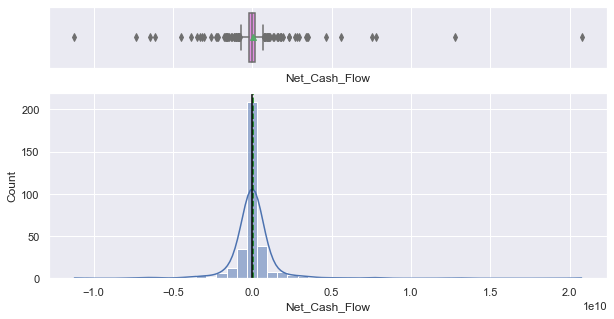

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, num_cols[5], bins=50, kde=True, figsize=(10, 5))

Net_Cash_Flow has a normal distribution with several positive and negative outliers

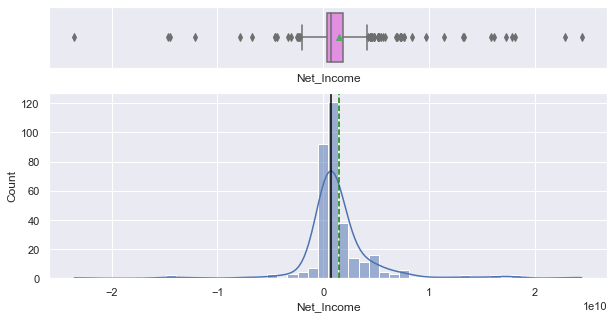

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, num_cols[6], bins=50, kde=True, figsize=(10, 5))

Net_Income has a normal distribution with some positive and a few negative outliers

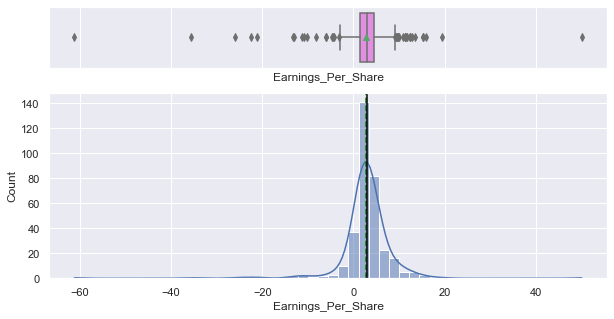

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, num_cols[7], bins=50, kde=True, figsize=(10, 5))

Earnings_Per_Share has a normal distribution with some positive and negative outliers

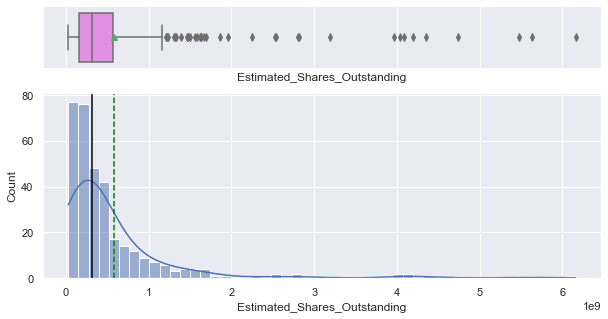

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, num_cols[8], bins=50, kde=True, figsize=(10, 5))

Estimated_Shares_Outstanding is right skewed with several positive outliers

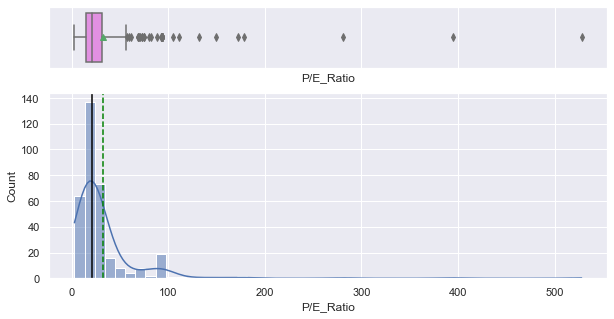

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, num_cols[9], bins=50, kde=True, figsize=(10, 5))

P/E_Ratio is right skewed with some positive outliers

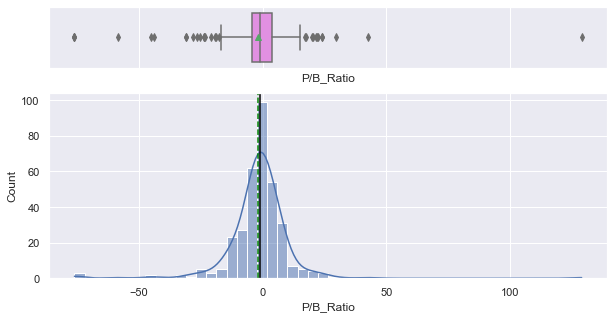

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, num_cols[10], bins=50, kde=True, figsize=(10, 5))

P/B_Ratio has a normal distribution with a few positive and negative outliers

In [25]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

###### GICS Sector

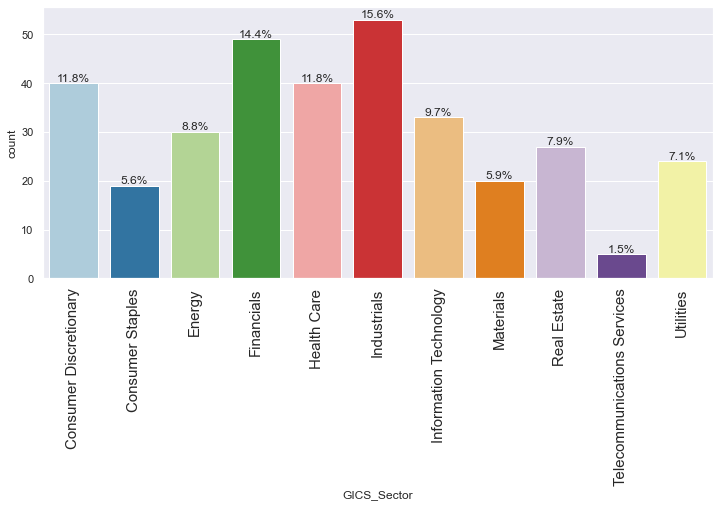

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "GICS_Sector", perc=True)

Majority of the securities belong to "Industries" GICS Sector and minority to "Telecommunication Services"

###### GICS Sub Industry

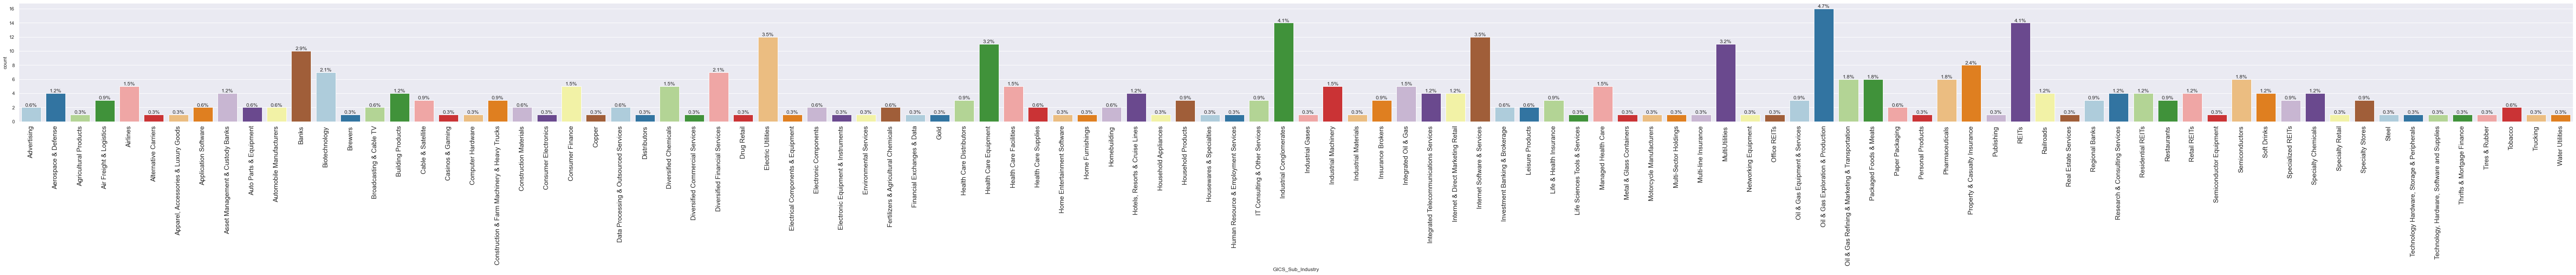

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "GICS_Sub_Industry", perc=True)

#### Bivariate Analysis

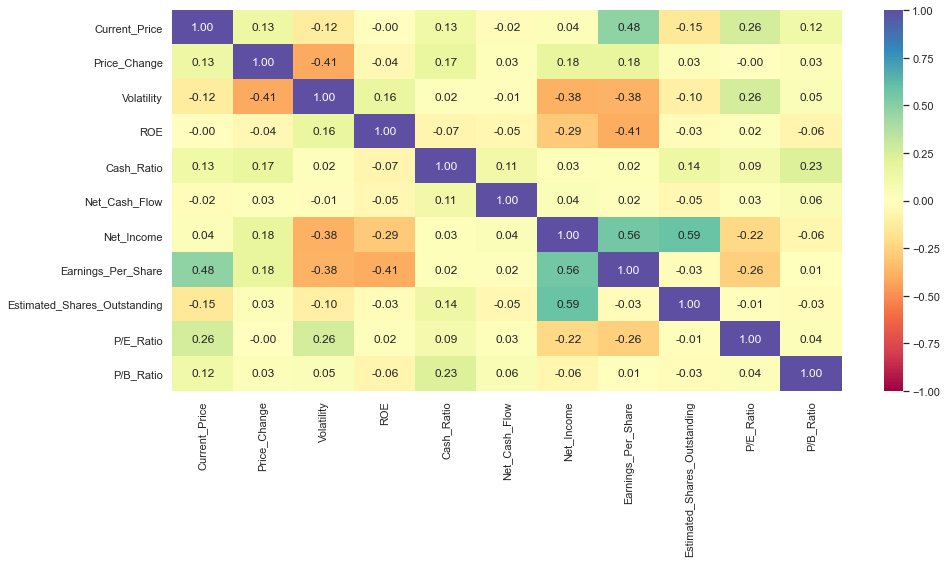

<IPython.core.display.Javascript object>

In [29]:
# check for correlations

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Price_Change has a negative correlation with Volatility (standard devaition of stock price, accounting for any big swings in price in either direction over the period). This indicates that more volatile the stocks, more 'negative' the Price_Change
Earnings_Per_Share has a positive correlation with Current_Price & Net_Income
Estimated_Shares_Outstanding has a positive correlation with Net_Income
Earnings_Per_Share has a negative correlation with ROE and Volatility

###### Let's check the stocks of which economic sector have seen the maximum price increase on average.

<Figure size 1080x576 with 0 Axes>

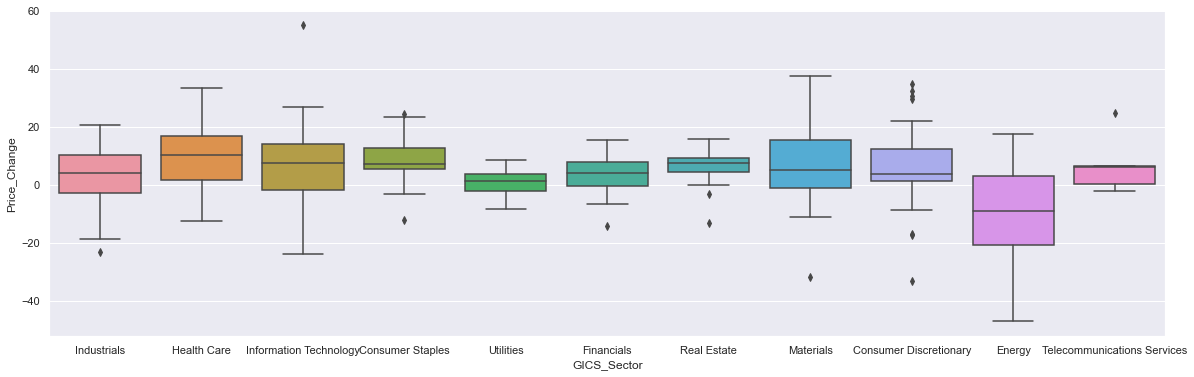

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 8))
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, y="Price_Change", x="GICS_Sector")

Real_Estate has seen the minimum variation in Price_Change across different securities it encompasses while Energy GICS_Sector has seen the maximum variation in Price_Change across its securities
Healthcare and Information Technology have maximum number of securities with a high positive Price_Change making them more favorable

###### average cash ratio vary across economic sectors

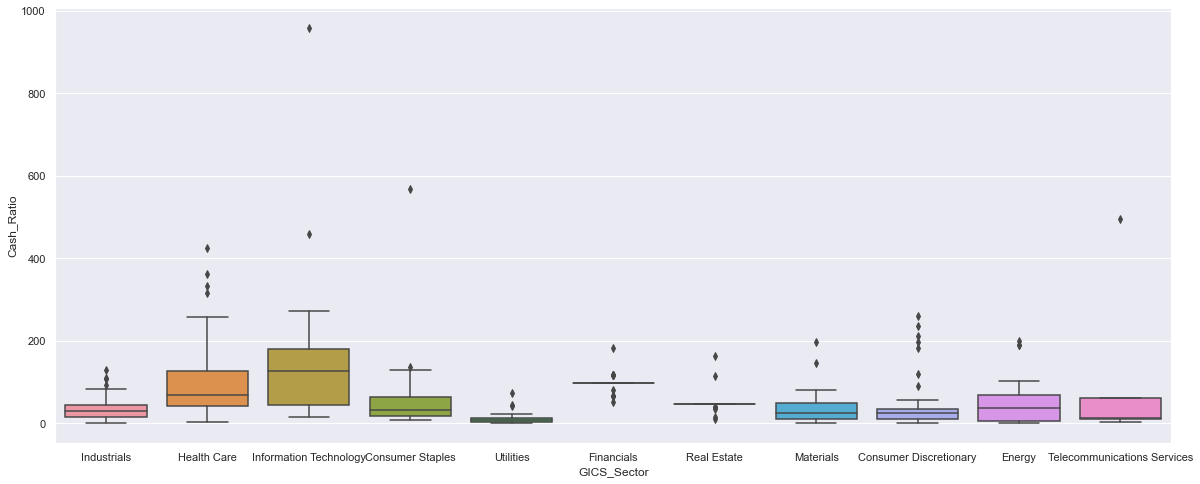

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, y="Cash_Ratio", x="GICS_Sector")

Real_Estate and Financials have the minimum Cash_Ratio variance across securities/companies in the respective GICS_sector while Informational Technology and Health Care have the maximum Cash_Ratio variance
Informational_Sector and Financials also have high median Cash_Ratios in comparison to other GICS_Sectors; Informational_Technology has some of the highest positive outliers for Cash_Ratio

###### P/E ratio vary, on average, across economic sectors

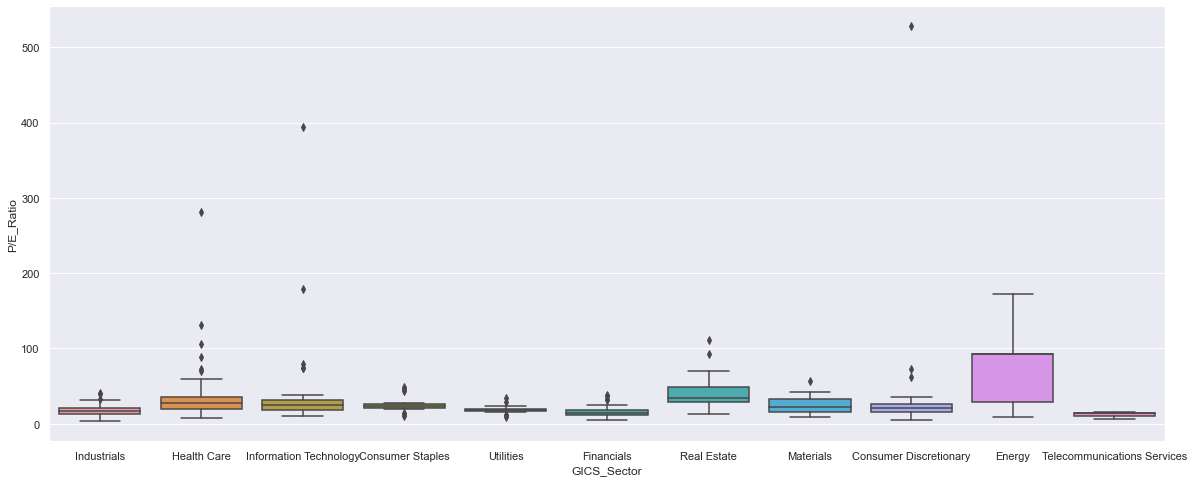

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, y="P/E_Ratio", x="GICS_Sector")

Energy GICS_Sector has some of the highest variance in P/E ratios as well has some securities/companies with high P/E ratios. This indicates an investor is willing to invest more in a single share of a company in this sector per dollar of its earnings as opposed to securities/companies in other GICS_Sectors


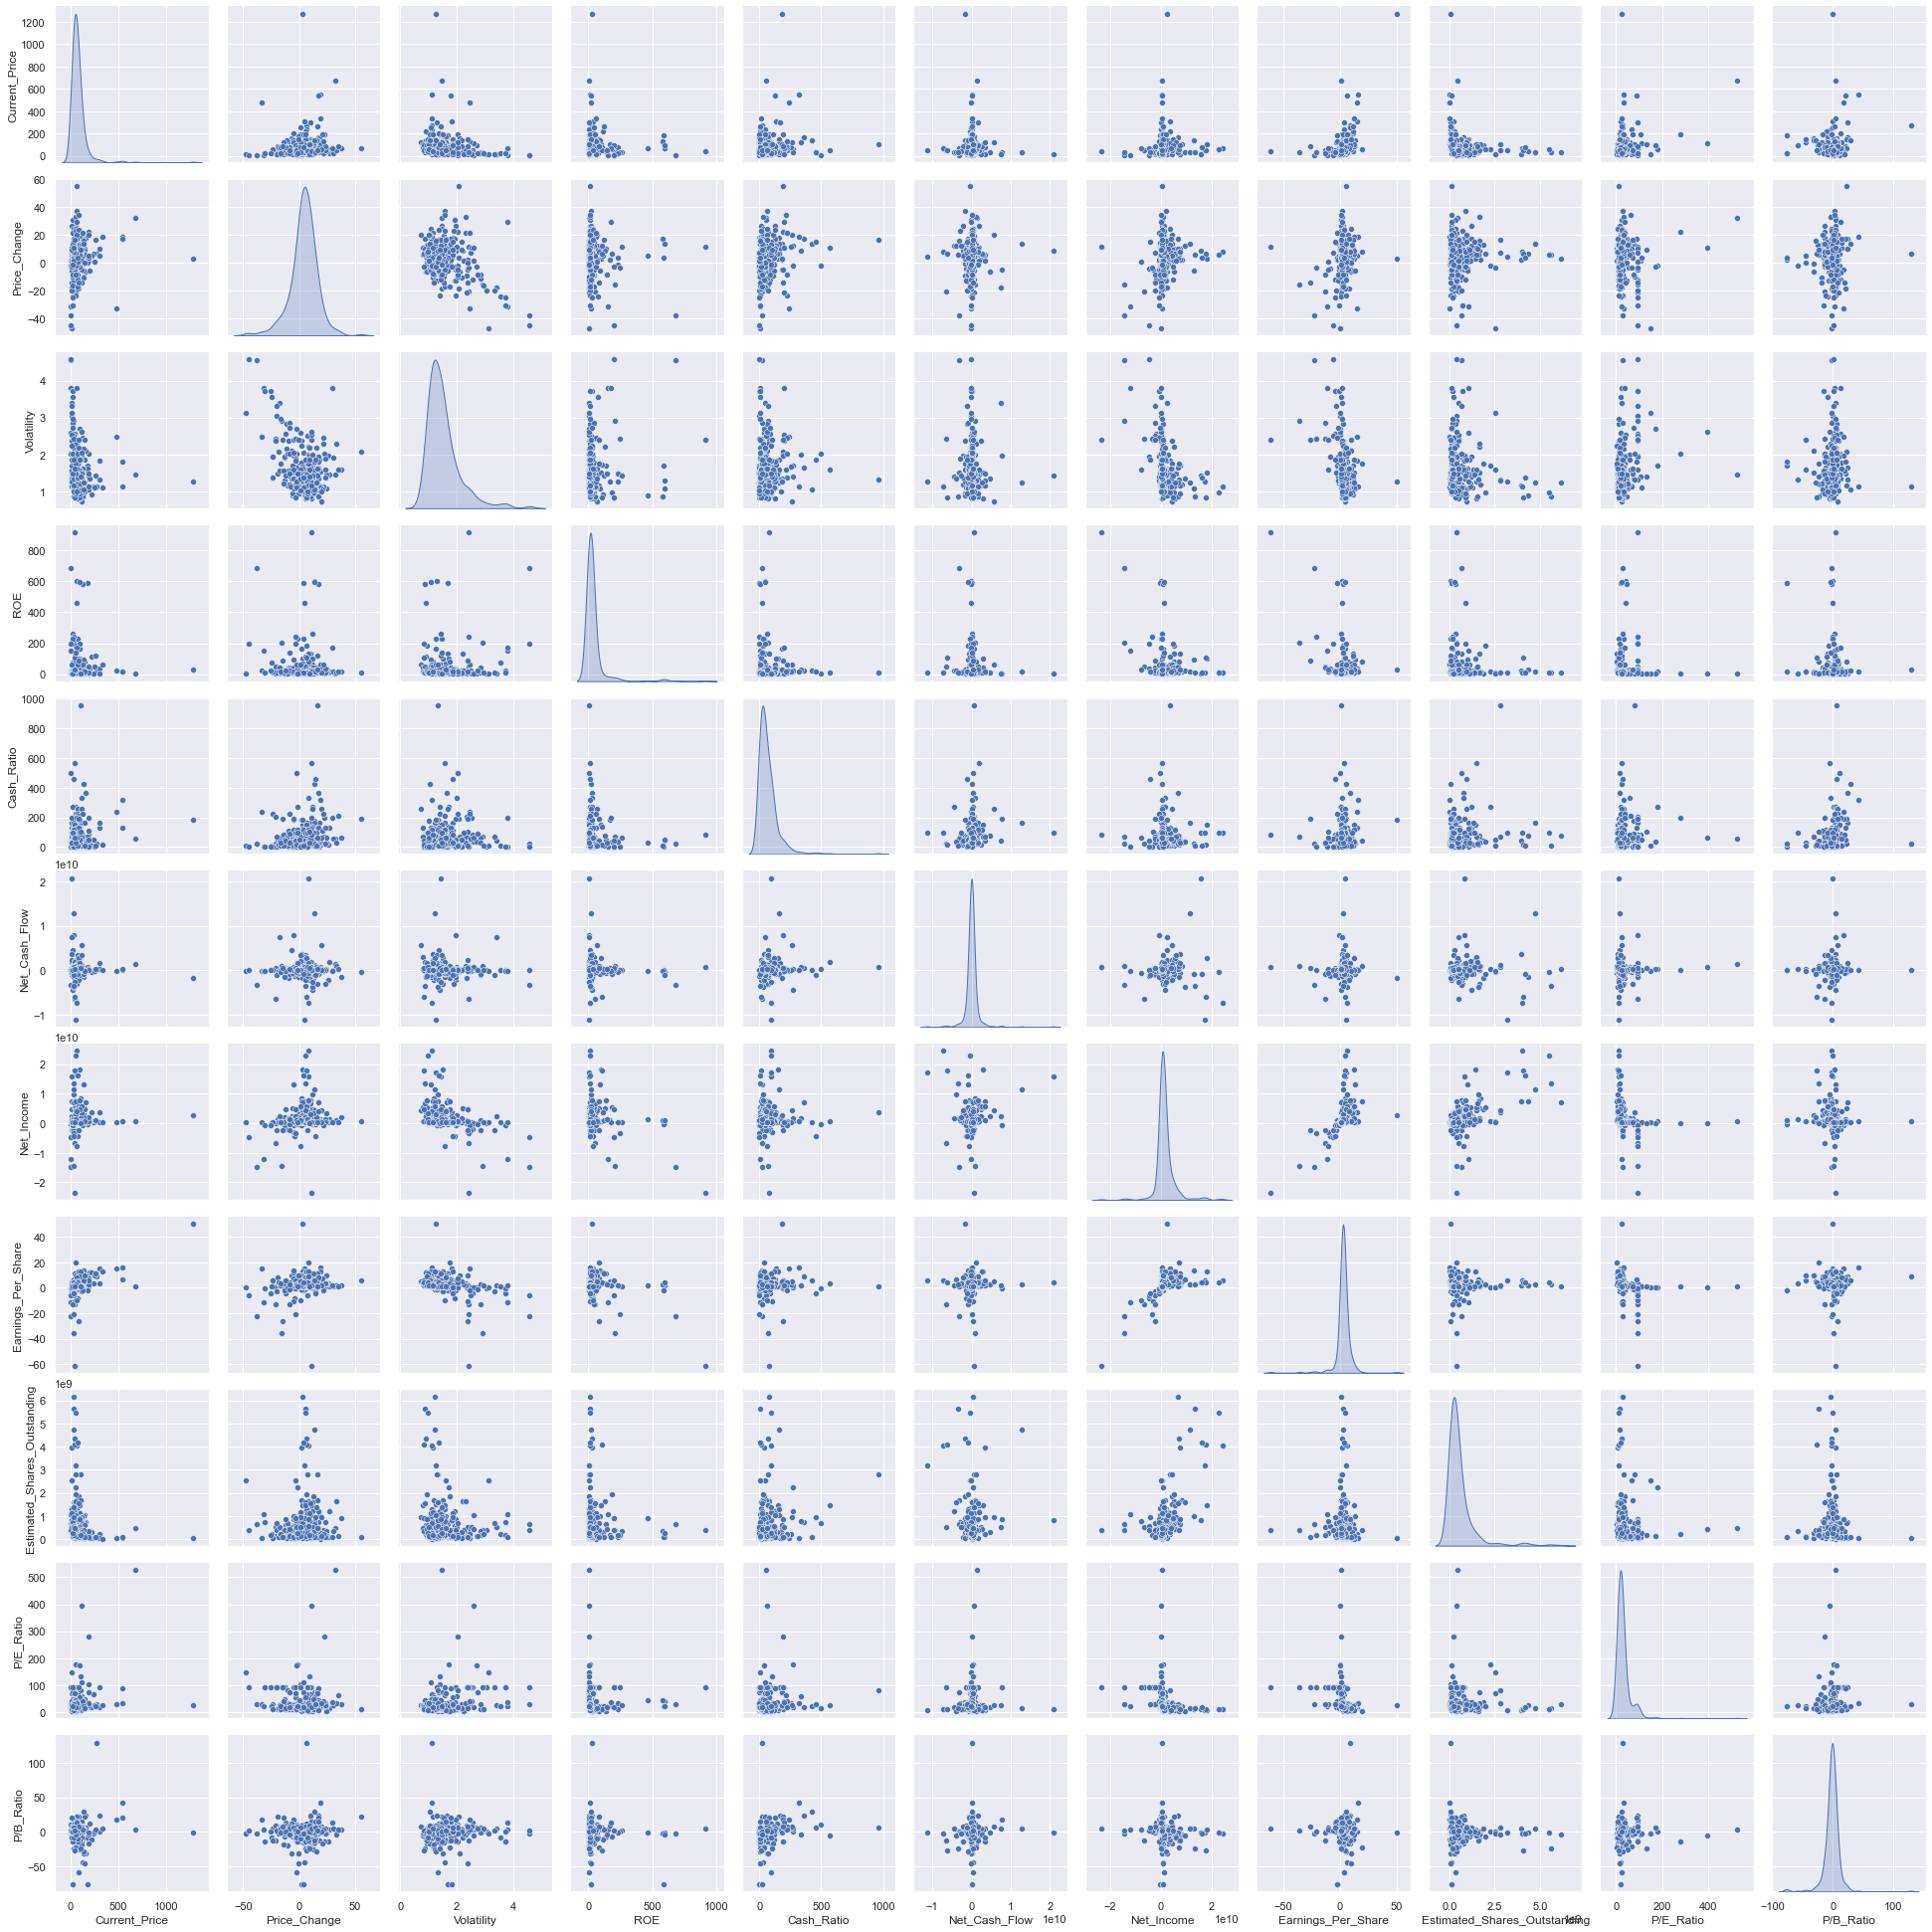

<IPython.core.display.Javascript object>

In [34]:
# Pair-plot analysis

sns.pairplot(df[num_cols], diag_kind="kde")

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

#### Outlier check

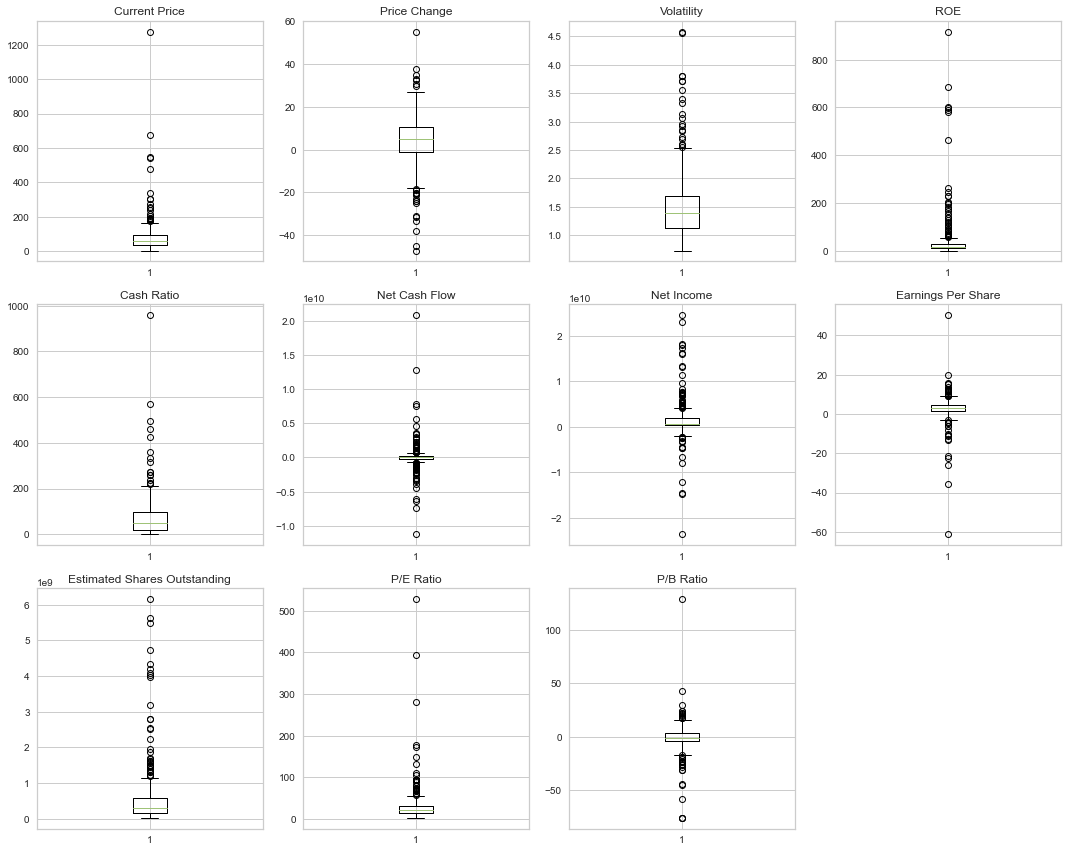

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(15, 12))

num_cols = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers have been identified, but not treated and they are assumed to be real data points

In [14]:
# variables used for clustering
num_cols

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

<IPython.core.display.Javascript object>

In [15]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [16]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

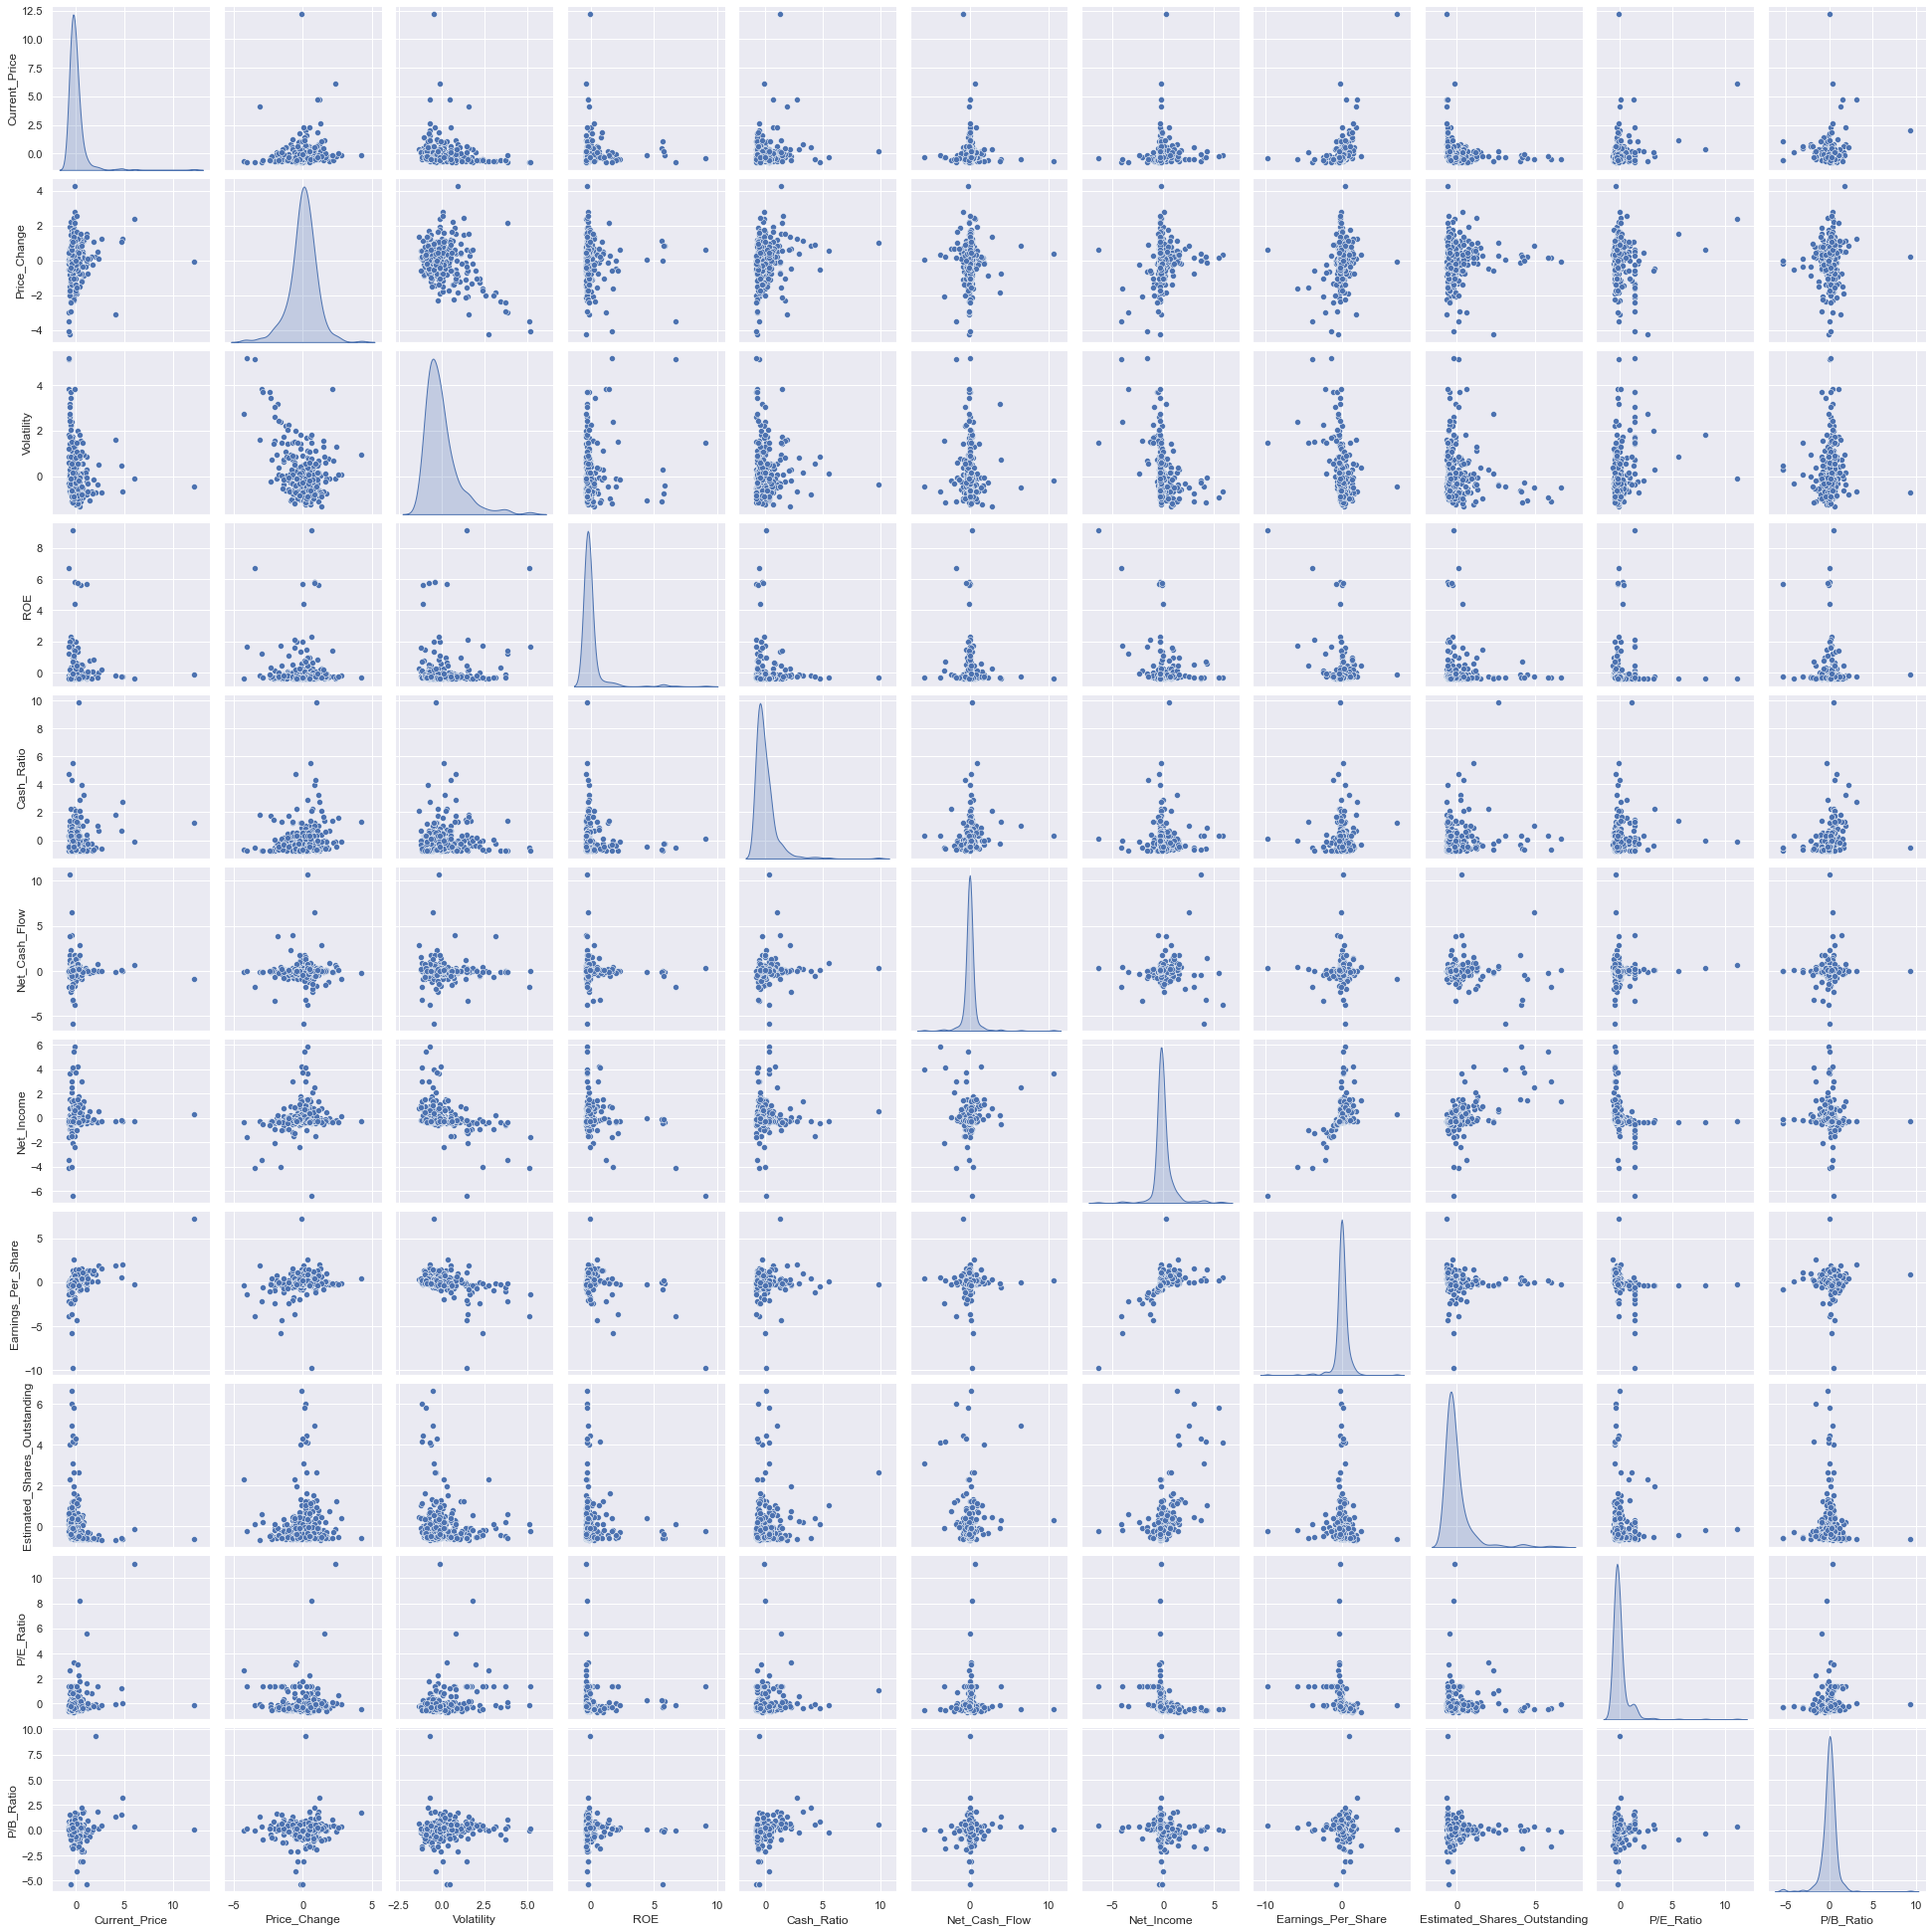

<IPython.core.display.Javascript object>

In [41]:
# Pair-plot analysis

sns.pairplot(subset_scaled_df, diag_kind="kde")

After feature engineering (scalar transformation), the relationship between the attributes have been maintained. However the attributes are now all on the same scale, with an average of 0, standard deviation of 1
The data has no missing values, nor duplicate entries. Outliers have been identified, but not treated and they are assumed to be real data points & not anomalies in this context for modeling

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.127287671408744
Number of Clusters: 6 	Average Distortion: 2.0757426145511024
Number of Clusters: 7 	Average Distortion: 2.0227114499977064
Number of Clusters: 8 	Average Distortion: 1.9796512529181611


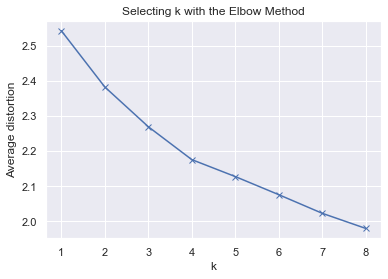

<IPython.core.display.Javascript object>

In [42]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

###### Let's check the silhouette scores.

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4495910932182279
For n_clusters = 5, silhouette score is 0.4261512779440718
For n_clusters = 6, silhouette score is 0.3882253109057665
For n_clusters = 7, silhouette score is 0.38829227290590673
For n_clusters = 8, silhouette score is 0.36416175818852714
For n_clusters = 9, silhouette score is 0.39190666771044297


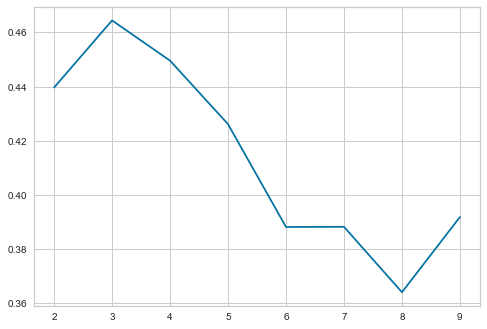

<IPython.core.display.Javascript object>

In [17]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

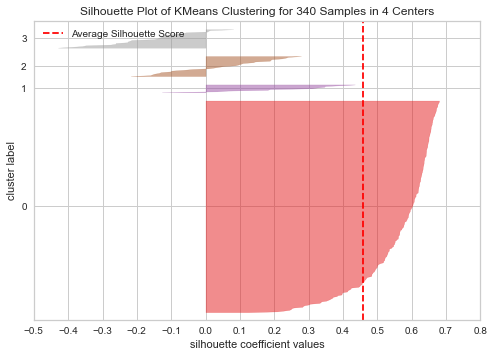

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [46]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

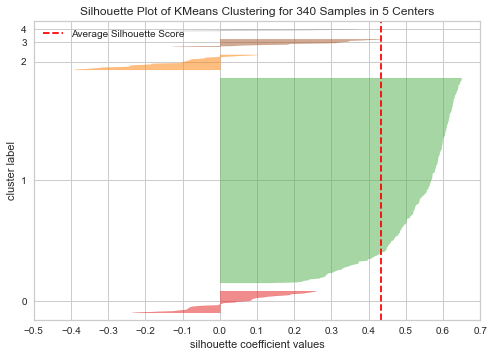

<IPython.core.display.Javascript object>

In [18]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

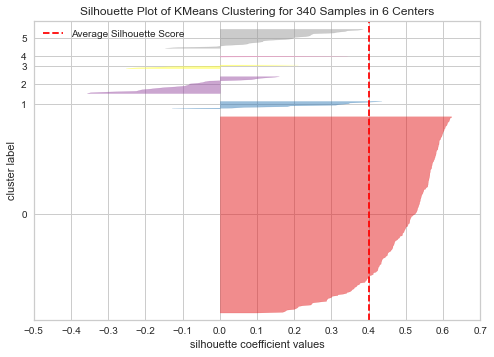

<IPython.core.display.Javascript object>

In [19]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

In [20]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

In [29]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

<IPython.core.display.Javascript object>

# Cluster Profiles

In [30]:
cluster_profile = df1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [31]:
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Security'].count().values

<IPython.core.display.Javascript object>

In [33]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


<IPython.core.display.Javascript object>

In [38]:
df1.groupby(["K_means_segments", "GICS Sector"])["Security"].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          6
                  Consumer Staples                1
                  Energy                          1
                  Financials                      1
                  Health Care                     9
                  Information Technology          5
                  Real Estate                     1
                  Telecommunications Services     1
1                 Energy                         22
                  Industrials                     1
                  Information Technology          3
                  Materials                       1
2                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     2
                  Information Technology          1
                  

<IPython.core.display.Javascript object>

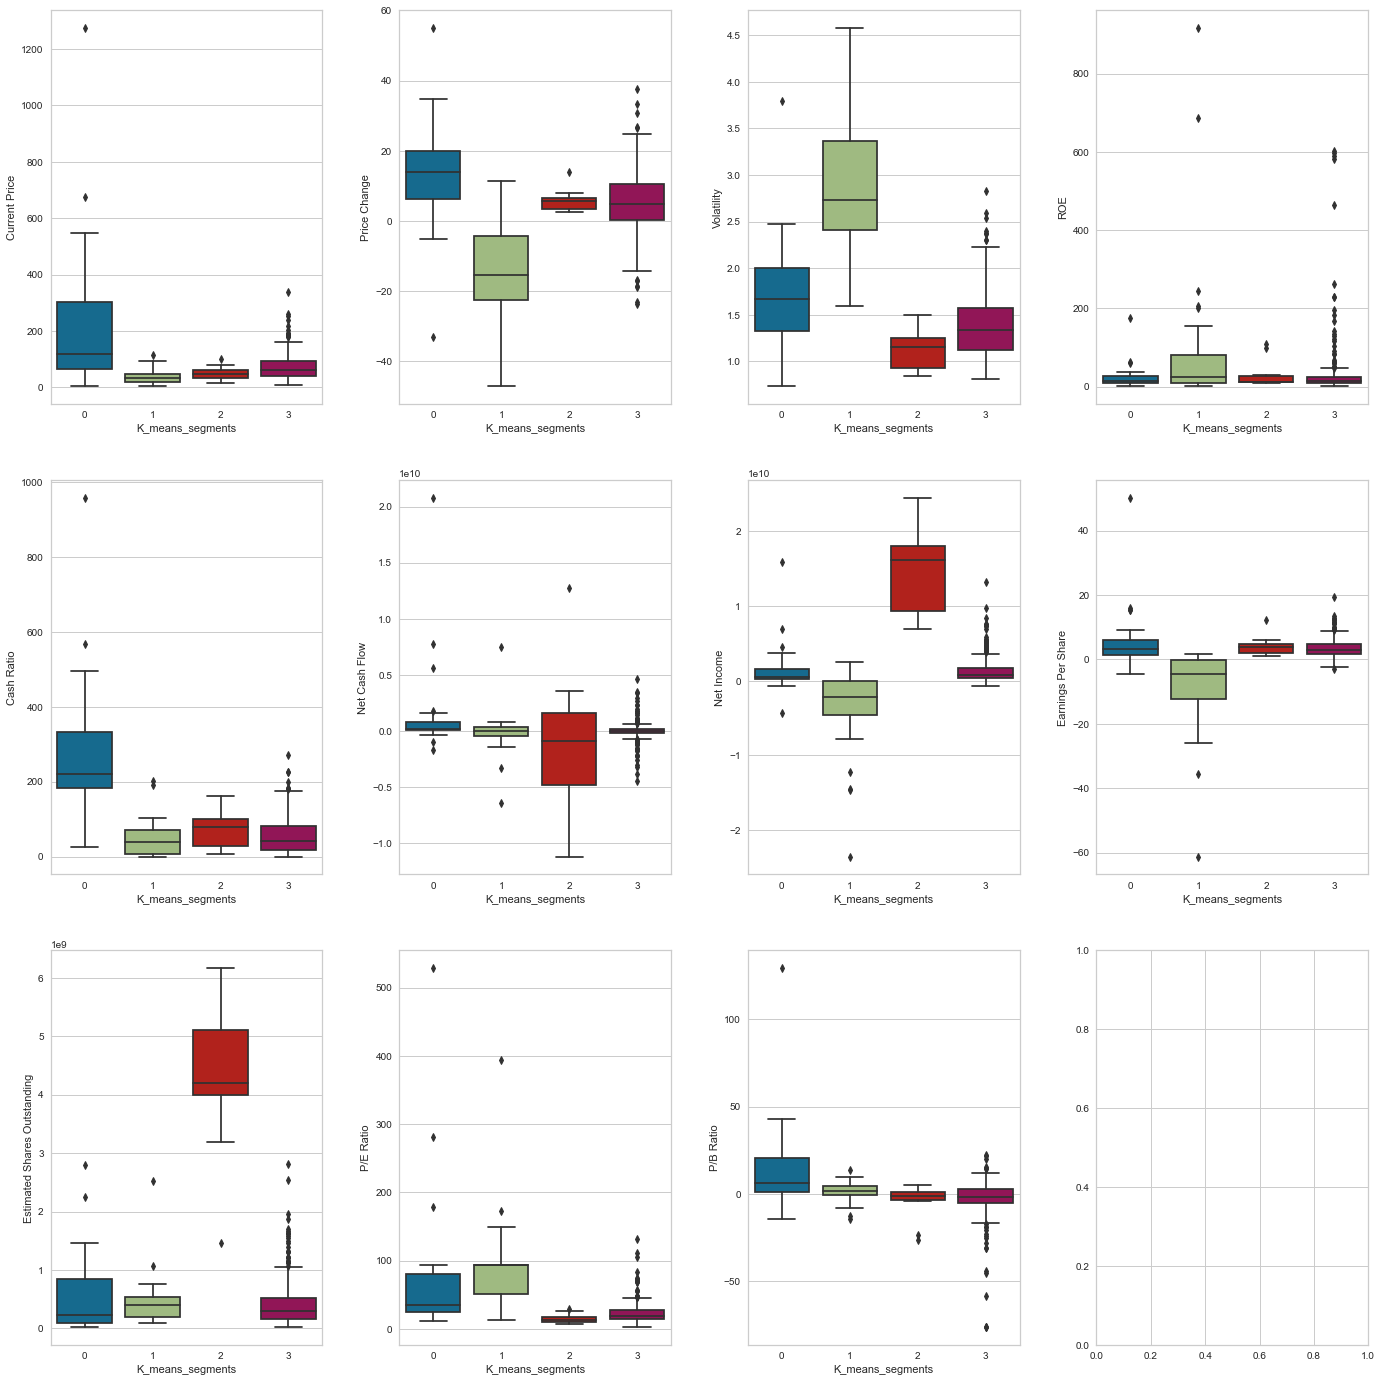

<IPython.core.display.Javascript object>

In [39]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4 + counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

#### Insights

#### Cluster 0

This cluster has securities with very high average Current_Price .
As well, cluster has securities with very high Cash_Ratio, high earnings per share  and high P/B_Ratio .

Cluster 1

This cluster has securities with among the lowest average Current_Price  and negative average Price_Change.

Cluster 3

This cluster has securities that lie in between Cluster 0 & Cluster 1 i.e, intermediate Current_Price  intermediate Price_Change.
Cluster 2

This cluster is very similar to Cluster 3 in it's behavior but with two striking differences:

Clusters 3 and 2 are the safe clusters.


## Hierarchical Clustering

In [41]:
hc_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [45]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9304469769832865.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8559480642212798.
Cophenetic correlation for Euclidean distance and average linkage is 0.946403836884538.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7508819056084053.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9161627445317929.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.822502094153258.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9379218754329659.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9153206618543516.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9348505176633236.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6881861661402056.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9360657692078034.
Cophenetic corr

<IPython.core.display.Javascript object>

In [61]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9494262703881242, which is obtained with Euclidean distance and centroid linkage


<IPython.core.display.Javascript object>

###### Let's explore different linkage methods with Euclidean distance only.

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9304469769832865
Cophenetic correlation for complete linkage is 0.8559480642212798
Cophenetic correlation for average linkage is 0.946403836884538
Cophenetic correlation for centroid linkage is 0.9494262703881242
Cophenetic correlation for ward linkage is 0.7436374975239648
Cophenetic correlation for weighted linkage is 0.7508819056084053


<IPython.core.display.Javascript object>

In [62]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9494262703881242, which is obtained with centroid linkage


<IPython.core.display.Javascript object>

###### Let's view the dendrograms for the different linkage methods with Euclidean distance.

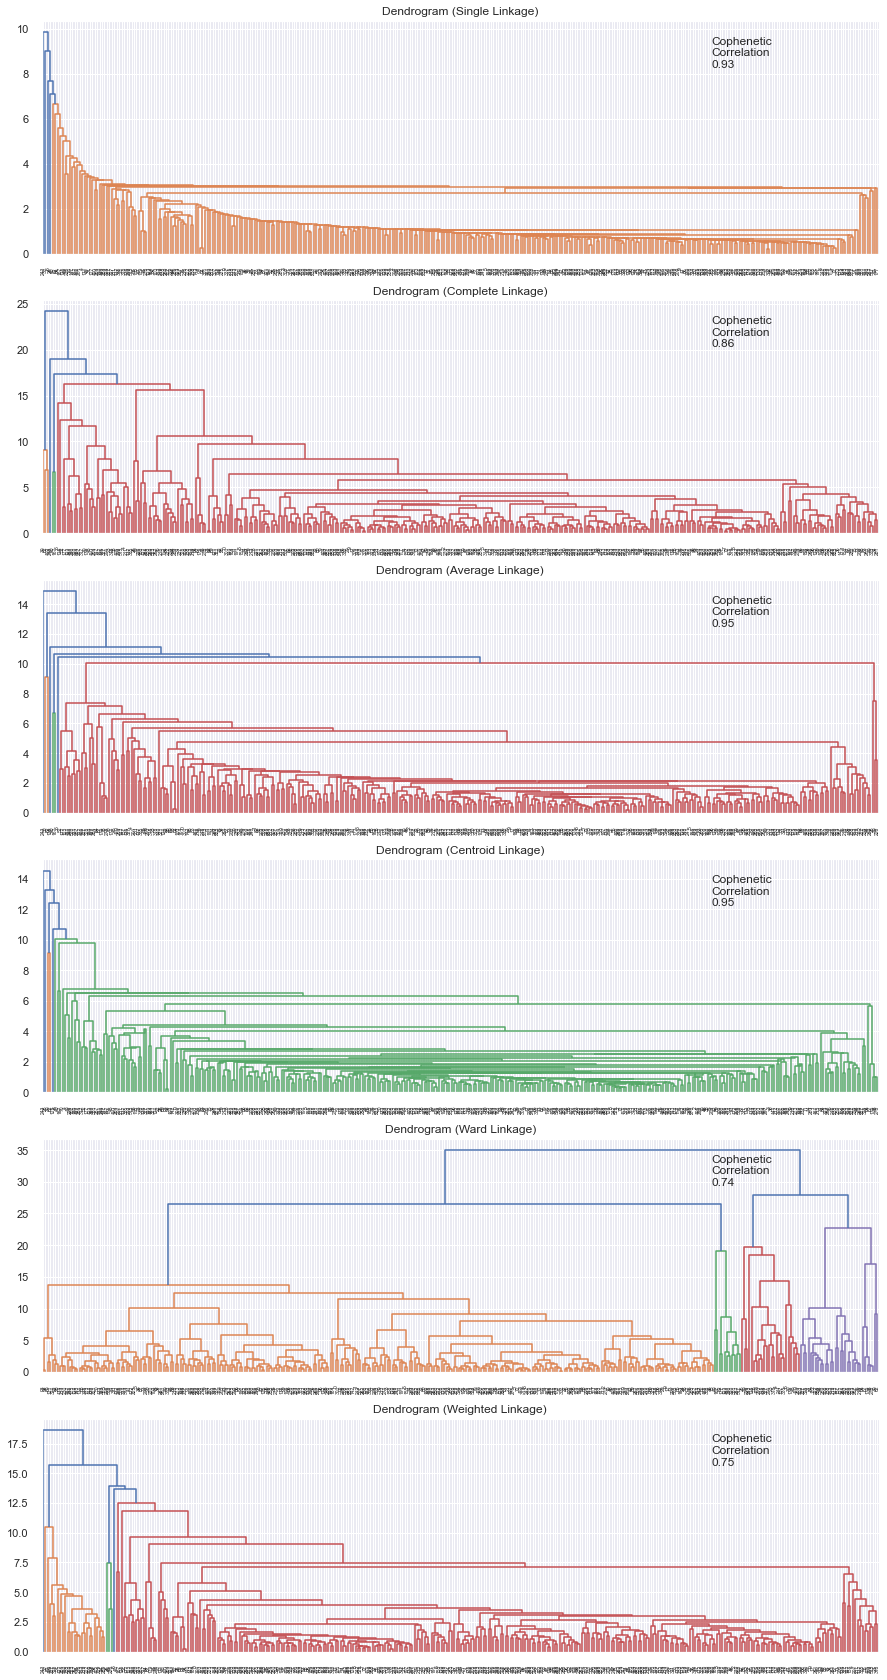

<IPython.core.display.Javascript object>

In [50]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

Cophenetic correlation is highest with eucledian distance & average or centroid linkages
6 appears to be the appropriate number of clusters from the dendrogram for average linkage

In [51]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.743637
5,weighted,0.750882
1,complete,0.855948
0,single,0.930447
2,average,0.946404
3,centroid,0.949426


<IPython.core.display.Javascript object>

In [52]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

<IPython.core.display.Javascript object>

In [53]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

#### Cluster Profiling

In [55]:
cluster_profile = df2.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [58]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [59]:
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_segments,,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-3.319732e+07,1.538075e+09,2.88527,5.605050e+08,32.441706,-2.174921,2.630631,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.29500,2.791829e+09,13.649696,1.508484,1.000000,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.81500,5.195740e+08,60.748608,1.565141,1.000000,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.31000,2.800763e+09,79.893133,5.884467,0.000000,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.09000,5.093552e+07,25.453183,-1.052429,0.000000,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,9.088500e+07,5.965410e+08,8.91000,6.695185e+07,31.040405,129.064585,0.000000,1


<IPython.core.display.Javascript object>

There are 5 clusters.
4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

In [63]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [65]:
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

#### Cluster Profiling

In [66]:
cluster_profile = df2.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [67]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [68]:
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_segments,,,,,,,,,,,,,
0,46.558126,-11.798670,2.617878,178.750000,50.250000,4.349716e+07,-3.197472e+09,-7.785312,4.732895e+08,72.496532,-0.780467,1.281250,32
1,42.848182,6.270446,1.123547,22.727273,71.454545,5.586364e+08,1.463127e+10,3.410000,4.242573e+09,15.242169,-4.924615,1.818182,11
2,246.574304,14.284326,1.769621,26.500000,279.916667,4.591202e+08,1.009206e+09,6.167917,5.494321e+08,90.097512,14.081386,0.041667,24
3,71.846974,4.953643,1.392784,25.117216,53.831502,1.197788e+06,1.557674e+09,3.691044,4.439183e+08,23.583804,-3.087957,2.996337,273


<IPython.core.display.Javascript object>

In [69]:
# let's see the names of the securities in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 273 Securities in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 '

<IPython.core.display.Javascript object>

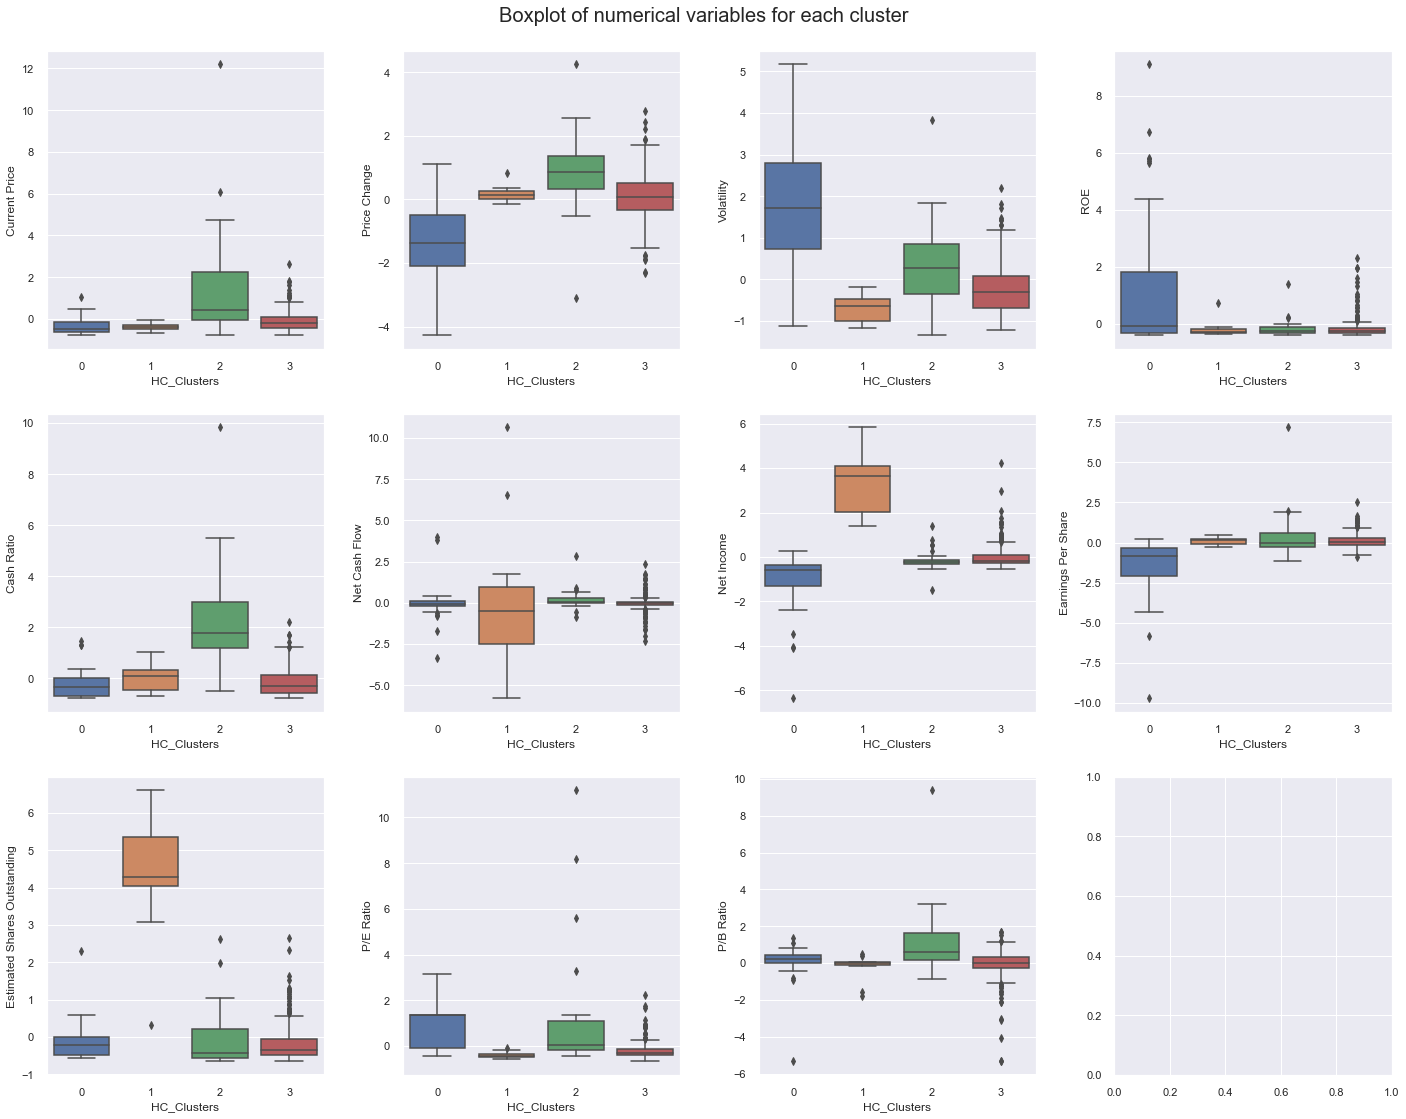

<IPython.core.display.Javascript object>

In [70]:
fig, axes = plt.subplots(3, 4, figsize=(20, 16))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii, jj],
                y=subset_scaled_df[num_cols[counter]],
                x=subset_scaled_df["HC_Clusters"],
            )
        counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

Cluster 0 of Hierarchical clustering
Similar to cluster 1 of K-Means clustering
Cluster 1 of Hierarchical clustering
Similar to cluster 3 of K-Means clustering
Cluster 2 of Hierarchical clustering
Similar to cluster 0 of K-Means clustering
Cluster 3 of Hierarchical clustering
Similar to cluster 2 of K-Means clustering


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [72]:
# Comparing Hierarchical cluster vs. K-means  cluster

pd.crosstab(df.K_means_segments, df.HC_Clusters).style.highlight_max(
    color="lightgreen", axis=0
)

HC_Clusters,0,1,2,3
K_means_segments,,,,
0,1,1,23,0
1,26,0,1,0
2,0,10,0,1
3,5,0,0,272


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations

- 

##### Exploratory Data Analysis
Current_Price of stocks, and Estimated_Shares_Outstanding  for all sectors is right skewed (with several positive outliers)

Health Care and Financial sectors have seen some of the highest positive Price_Change.

Informational Technology and Financial sectors have some of the highest Cash_Ratios.

Real Estate sector has seen minimum variation in Price_Change & minimum variation in Cash_Ratio.

Energy sector has some of the highest variance in Price_Change across securities . However, this sector has securities with high P/E_Ratios.

##### Clustering 

One cluster with  Health Care followed by Consumer Discretionary and Information Technology sectors
Another cluster belonging predominantly to Energy sector
Another cluster  belonging predominantly to Financials sector



###### Recommendations

This is important in an effort to split the stocks across investments that are diversified, enabling one to maximize earnings in any market condition.
